In [107]:
pip install tensorflow keras split-folders opencv-python


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [79]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
import splitfolders
import cv2
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras import layers, models
import os
import random
from PIL import Image

In [143]:
# Split the images in the kaggle dataset into 3 different subfolders
input_folder = "/Users/zhoujingchun/Desktop/Agricultural-crops"
output_folder = "/Users/zhoujingchun/Desktop/ImageRecognition"

split_ratio = (0.8, 0.1, 0.1)

splitfolders.ratio(
    input_folder, 
    output = output_folder,
    seed = 500,
    ratio = split_ratio,
    group_prefix = None
)
    

Copying files: 829 files [00:00, 1285.72 files/s]


In [145]:
img_size = (224, 224)
batch_size = 32

train_datagen = ImageDataGenerator(
    preprocessing_function = preprocess_input,
    rotation_range = 20,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest'
)

    
    

In [147]:
# Data augmentation (rescale)
test_datagen = ImageDataGenerator(preprocessing_function = preprocess_input)
valid_datagen = ImageDataGenerator(preprocessing_function = preprocess_input)

In [149]:
train_dir = os.path.join(output_folder, 'train')
val_dir = os.path.join(output_folder, 'val')
test_dir = os.path.join(output_folder, 'test')

train_data = train_datagen.flow_from_directory(
    train_dir, 
    target_size = img_size,
    batch_size = batch_size,
    class_mode = 'categorical'
)

valid_data = valid_datagen.flow_from_directory(
    val_dir,
    target_size = img_size,
    batch_size = batch_size,
    class_mode = 'categorical'
)

test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size = img_size,
    batch_size = batch_size,
    class_mode = 'categorical'
)
    





Found 652 images belonging to 30 classes.
Found 72 images belonging to 30 classes.
Found 105 images belonging to 30 classes.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


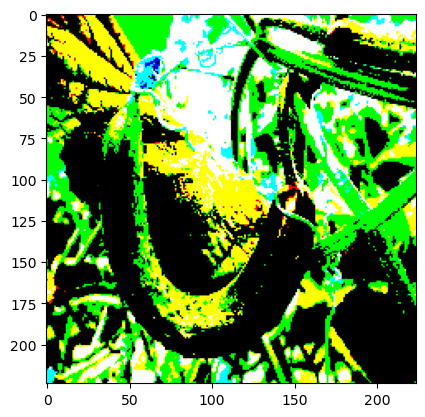

In [37]:
# Print random img
images, labels = next(valid_data)
i = random.randint(0, images.shape[0] - 1)

plt.imshow(images[i])
plt.show()

In [41]:
from keras.applications.resnet import ResNet50
base_model = ResNet50(
    weights = 'imagenet',
    include_top = False,
    input_shape = (img_size[0], img_size[1], 3)
)

base_model.trainable = False


In [45]:
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation = 'relu'),
    layers.Dropout(0.5),
    layers.Dense(30, activation = 'softmax')
])

In [49]:
model.compile(
    optimizer = 'adam',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)

In [151]:
# Training for 100 epochs
model.fit(
    train_data, 
    epochs = 100, 
    validation_data = valid_data
)

Epoch 1/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 23s 1s/step - accuracy: 0.9188 - loss: 0.2259 - val_accuracy: 0.8472 - val_loss: 0.7178
Epoch 2/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step - accuracy: 0.9375 - loss: 0.2303 - val_accuracy: 0.8056 - val_loss: 0.8906
Epoch 3/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.9238 - loss: 0.2607 - val_accuracy: 0.8611 - val_loss: 0.6805
Epoch 4/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 27s 1s/step - accuracy: 0.9399 - loss: 0.1693 - val_accuracy: 0.8472 - val_loss: 0.6293
Epoch 5/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 27s 1s/step - accuracy: 0.9441 - loss: 0.1677 - val_accuracy: 0.8056 - val_loss: 0.7206
Epoch 6/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 29s 1s/step - accuracy: 0.9283 - loss: 0.2205 - val_accuracy: 0.8333 - val_loss: 0.7373
Epoch 7/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 27s 1s/step - accuracy: 0.9167 - loss: 0.2095 - val_accuracy: 0.8194 - val_loss: 0.7288
Epoch 8/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 31s 1s/step - accuracy: 0.9190 - loss: 0.2285 - val_accuracy: 0.8333 - v

In [157]:
# Evaluate overall accuracy
test_loss, test_accuracy = model.evaluate(test_data)
print(f'Test Accuracy: {test_accuracy * 100: .2f}%')

4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.8800 - loss: 0.6513
Test Accuracy:  86.67%


In [159]:
class_names = {
    0: 'Cherry', 
    1: 'Coffee-plant', 
    2: 'Cucumber', 
    3: 'Fox_nut(Makhana)', 
    4: 'Lemon', 
    5: 'Olive-tree', 
    6: 'Pearl_millet(bajra)', 
    7: 'Tobacco-plant', 
    8: 'almond', 
    9: 'banana', 
    10: 'cardamom', 
    11: 'chilli', 
    12: 'clove', 
    13: 'coconut', 
    14: 'cotton', 
    15: 'gram', 
    16: 'jowar', 
    17: 'jute', 
    18: 'maize', 
    19: 'mustard-oil', 
    20: 'papaya', 
    21: 'pineapple', 
    22: 'rice', 
    23: 'soybean', 
    24: 'sugarcane', 
    25: 'sunflower', 
    26: 'tea', 
    27: 'tomato', 
    28: 'vigna-radiati(Mung)', 
    29: 'wheat'
}

In [161]:
def predict_img(image, model):
    test_img = cv2.imread(image)
    test_img = cv2.resize(test_img, (224, 224))
    test_img = np.expand_dims(test_img, axis = 0)
    result = model.predict(test_img)
    r = np.argmax(result)
    print('Category: ' + class_names[r])

def categorize(img):
    imgArray = np.array(Image.open(img))
    plt.imshow(imgArray)
    plt.show()
    return predict_img(img, model)

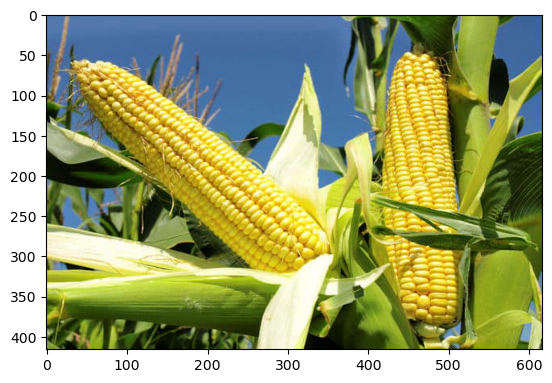

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
Category: maize


In [167]:
# Print the image and let the model recognise its category
    
testImg = '/Users/zhoujingchun/Desktop/ImageRecognition/test/maize/image (6).jpg'
categorize(testImg)

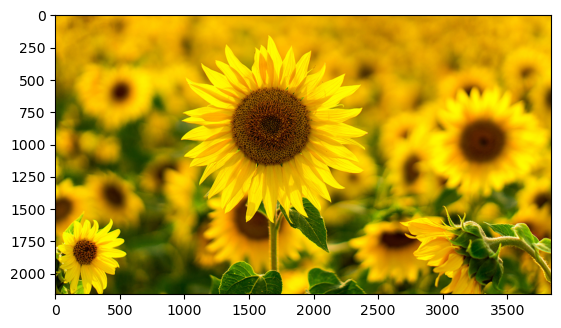

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Category: sunflower


In [165]:
# Testing using an image from Google which was not used to train the model
googleImg = '/Users/zhoujingchun/Desktop/test-img-from-google.webp'
categorize(googleImg)